# NLP EDA

Basically, exploration and modeling boil down to a single question:

How do we quantify our data/text

In this lesson, we'll explore answers to this question that will aid in visualization.

- word frequency (by label)
- ngrams
- word cloud
- sentiment analysis
- other common features

## Setup

Data is spam/ham text messages.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re

In [2]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [3]:
# basic cleaning function:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [5]:
# acquire data from spam_db

from env import username, password, host

def get_db_url(database, host=host, user=username, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [35]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [6]:
df.iloc[1].text

'Ok lar... Joking wif u oni...'

In [8]:
df[df.label == 'ham'].text

id
0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
                              ...                        
5565                                         Huh y lei...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 4825, dtype: object

In [9]:
''.join(['this', ' is' , ' a ', 'list of strings'])

'this is a list of strings'

In [36]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))

In [37]:
spam_words = clean(' '.join(df[df.label == 'spam'].text))

In [38]:
all_words = clean(' '.join(df.text))

In [39]:
# combine all messages in single string by label


In [40]:
len(all_words), len(spam_words), len(ham_words)

(50305, 12163, 38142)

In [42]:
ham_freq = pd.Series(ham_words.split()).value_counts()

In [19]:
spam_freq = pd.Series(spam_words.split()).value_counts()

In [20]:
all_freq = pd.Series(all_words.split()).value_counts()

In [43]:
ham_freq = pd.Series(ham_words).value_counts()

In [44]:
spam_freq = pd.Series(spam_words).value_counts()

In [46]:
all_freq = pd.Series(all_words).value_counts()

In [47]:
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham','spam','all']

In [48]:
word_counts

,ham,spam,all
im,449,13,462
get,314,83,397
go,273,31,304
ok,272,5,277
dont,257,22,279
...,...,...,...
resub,0,1,1
expired,0,1,1
9153,0,1,1
okmail,0,1,1


In [49]:
word_counts.sample(10).head(5)

,ham,spam,all
pendingi,1,0,1
knowhe,1,0,1
theatre,6,0,6
ugh,12,0,12
mytonecomenjoy,0,1,1


## Exploration

Represent text as word frequencies.

In [ ]:
# concat all frequencies together into a dataframe



- What are the most frequently occuring words?
- Are there any words that uniquely identify a spam or ham message? I.e. words present in one type of message but not the other?

In [50]:
# sort by 'all'

word_counts.sort_values('all', ascending=False).head(10)

,ham,spam,all
call,241,359,600
im,449,13,462
get,314,83,397
ur,240,144,384
go,273,31,304
4,168,119,287
dont,257,22,279
ok,272,5,277
free,59,216,275
know,241,26,267


In [51]:
# sort by 'ham' and 'spam' columns
word_counts.sort_values('ham', ascending=False).head(10)

,ham,spam,all
im,449,13,462
get,314,83,397
go,273,31,304
ok,272,5,277
dont,257,22,279
come,242,5,247
know,241,26,267
call,241,359,600
ur,240,144,384
ill,236,1,237


In [52]:
word_counts.sort_values('spam', ascending=False).head(10)

,ham,spam,all
call,241,359,600
free,59,216,275
txt,13,150,163
ur,240,144,384
text,77,137,214
mobile,15,135,150
4,168,119,287
claim,0,115,115
stop,40,113,153
reply,43,102,145


In [53]:
word_counts.sort_values(['ham', 'spam', 'all'], ascending=False).head(10)

,ham,spam,all
im,449,13,462
get,314,83,397
go,273,31,304
ok,272,5,277
dont,257,22,279
come,242,5,247
call,241,359,600
know,241,26,267
ur,240,144,384
ill,236,1,237


### Visualization

- ham vs spam count for 20 most common words
- ham vs spam proportion for 20 most common words

<AxesSubplot:>

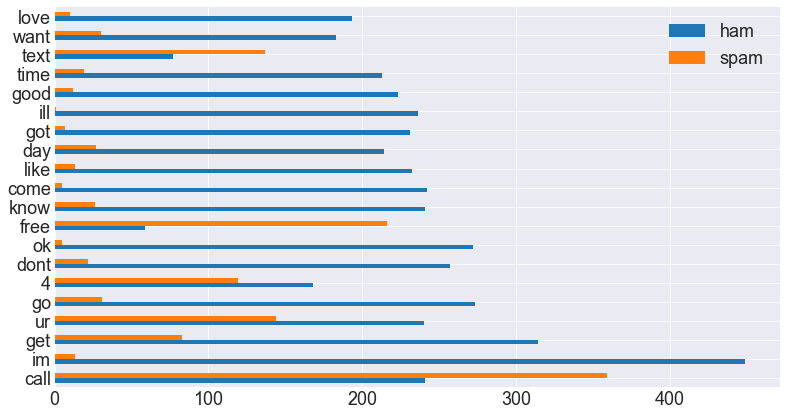

In [56]:
plt.rc('font', size=18)
word_counts.sort_values('all', ascending=False)[['ham', 'spam']].head(20).plot.barh()

<Figure size 1152x648 with 0 Axes>

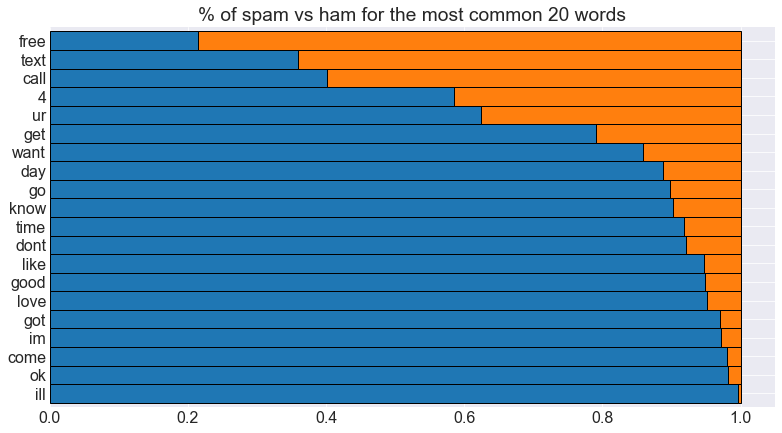

In [59]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=16)

(word_counts.sort_values('all', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'spam')
 .plot.barh(stacked = True, width = 1, ec = 'k', legend=False)
)
plt.title('% of spam vs ham for the most common 20 words')
plt.show()

<Figure size 1152x648 with 0 Axes>

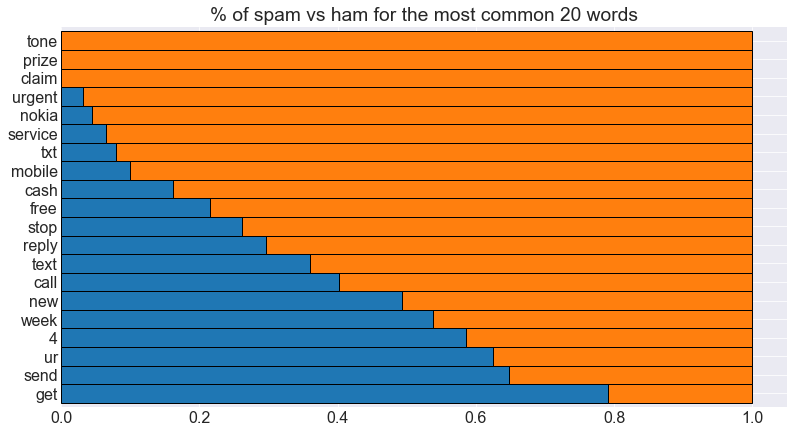

In [60]:
plt.figure(figsize=(16, 9))
plt.rc('font', size=16)

(word_counts.sort_values('spam', ascending=False)
 .head(20)
 .apply(lambda row: row/row['all'], axis = 1)
 .drop(columns = 'all')
 .sort_values(by = 'spam')
 .plot.barh(stacked = True, width = 1, ec = 'k', legend=False)
)
plt.title('% of spam vs ham for the most common 20 words')
plt.show()

## n-grams

**bigram**: combinations of 2 words

Represent text as combinations of 2 words

In [62]:
sentence = 'Today is tuesday, and the weather is nice.'

In [63]:
clean(sentence)

['today', 'tuesday', 'weather', 'nice']

In [65]:
list(nltk.bigrams(clean(sentence)))

[('today', 'tuesday'), ('tuesday', 'weather'), ('weather', 'nice')]

In [68]:
list(nltk.ngrams(clean(sentence), n=3))

[('today', 'tuesday', 'weather'), ('tuesday', 'weather', 'nice')]

**Be Careful!** Make sure you are making bigrams out of *words*.

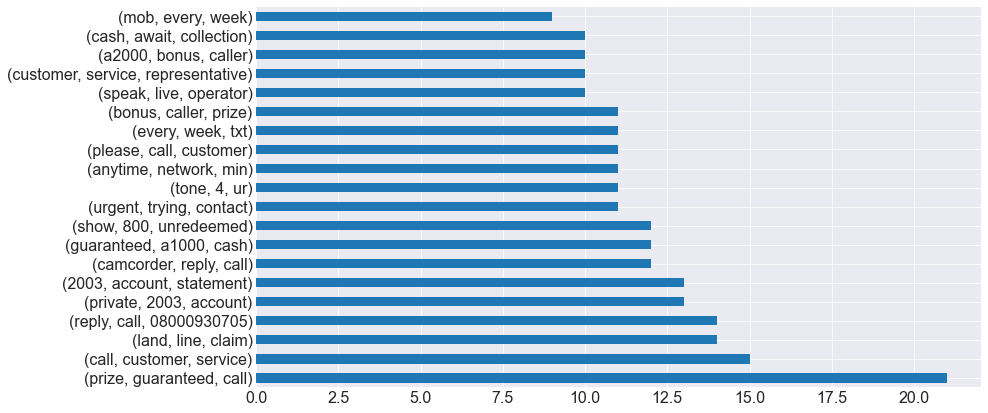

In [72]:
pd.Series(nltk.ngrams(spam_words, n=3)).value_counts().head(20).plot.barh()
plt.show()

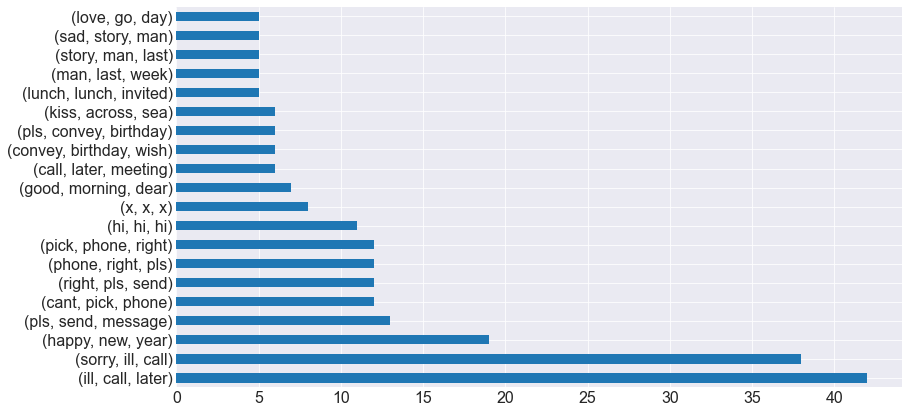

In [73]:
pd.Series(nltk.ngrams(ham_words, n=3)).value_counts().head(20).plot.barh()
plt.show()

- what are the most common bigrams? spam bigrams? ham bigrams?
- visualize 20 most common bigrams, most common ham bigrams
- ngrams

Find the most common bigram and then find a representative text

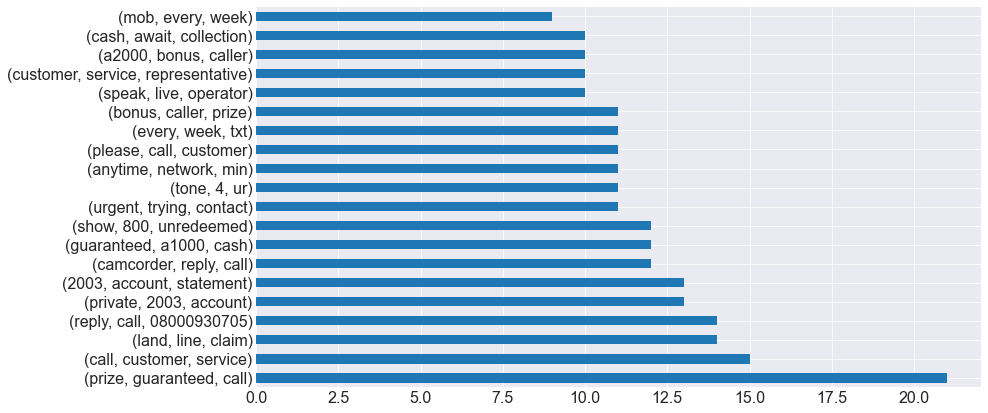

In [77]:
pd.Series(nltk.ngrams(spam_words, n=3)).value_counts(ascending=False).head(20).plot.barh()
plt.show()

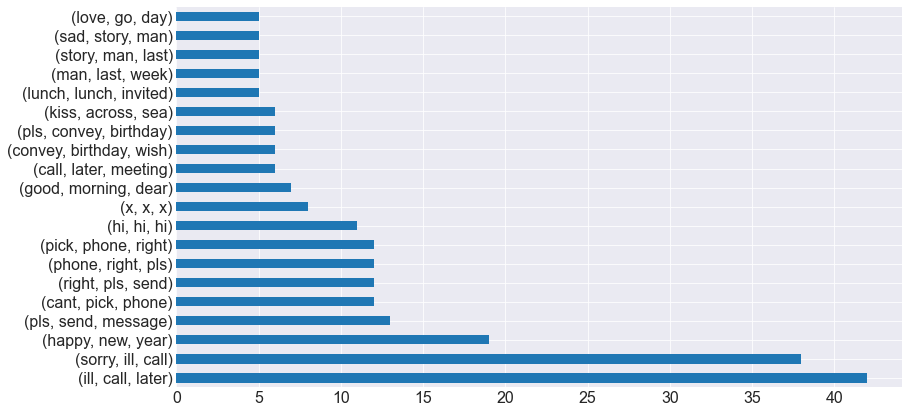

In [75]:
pd.Series(nltk.ngrams(ham_words, n=3)).value_counts(ascending=False).head(20).plot.barh()
plt.show()

## Word Cloud

`python -m pip install --upgrade wordcloud`

documentation: https://amueller.github.io/word_cloud/

In [78]:
from wordcloud import WordCloud

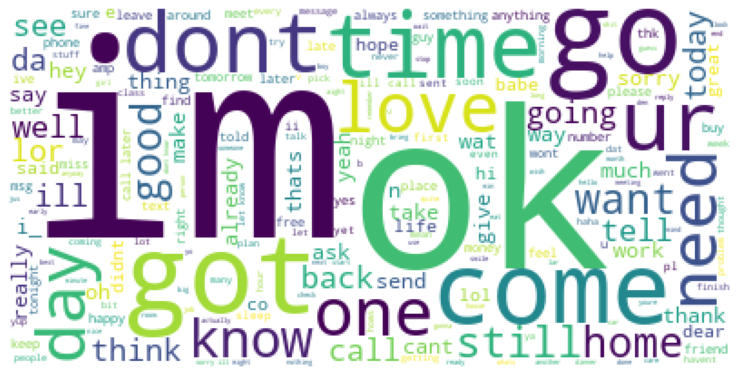

In [81]:
img= WordCloud(background_color='white').generate(' '.join(ham_words))
plt.imshow(img)
plt.axis('off')
plt.show()

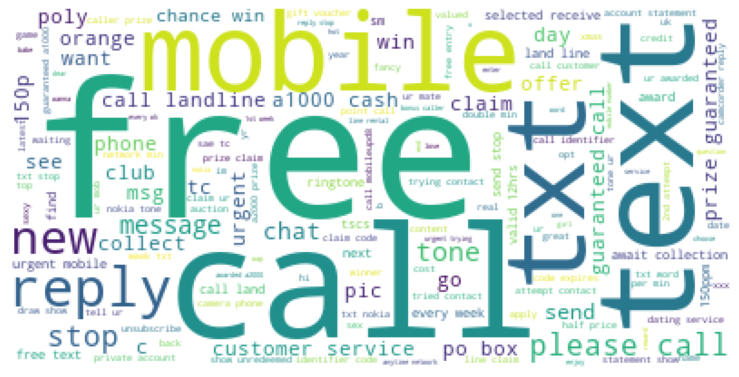

In [82]:
img= WordCloud(background_color='white').generate(' '.join(spam_words))
plt.imshow(img)
plt.axis('off')
plt.show()

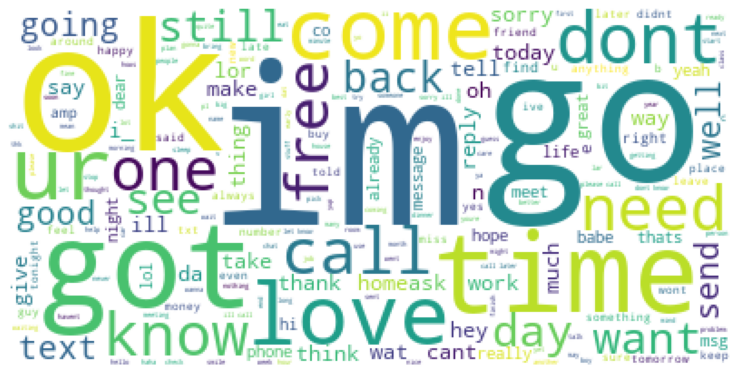

In [83]:
img= WordCloud(background_color='white').generate(' '.join(all_words))
plt.imshow(img)
plt.axis('off')
plt.show()

## Other Common Features

Any NLP dataset will have domain specific features, for example: number of retweets, number of @mentions, number of upvotes, or mean time to respond to a support chat. In addition to these domain specific features, some common measures for a document are:

- character count
- word count
- sentence count
- stopword count
- unique word count
- punctuation count
- average word length
- average words per sentence
- word to stopword ratio

Create one or more of the above features and visualize it.

In [ ]:
# add two new columns 'message_length' and 'word_count'

In [84]:
df['message_length'] = df.text.str.len()

In [86]:
df.head()

,label,text,message_length
id,,,
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [88]:
df['word_count'] = df.text.apply(clean).apply(len)

In [89]:
df.head()

,label,text,message_length,word_count
id,,,,
0,ham,"Go until jurong point, crazy.. Available only ...",111,16
1,ham,Ok lar... Joking wif u oni...,29,5
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,22
3,ham,U dun say so early hor... U c already then say...,49,7
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,8


## Sentiment

A number indicating whether the document is positive or negative.

- knowledge-based + statistical approach
- relies on human-labelled data
    - combination of qualitative and quantitative methods
    - then empirically validate
- different models for diff domains (e.g. social media vs news)
- for social media
    - Afinn ([github](https://github.com/fnielsen/afinn) + [whitepaper](http://www2.imm.dtu.dk/pubdb/edoc/imm6006.pdf))
    - Vader ([github](https://github.com/cjhutto/vaderSentiment) + [whitepaper](http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf)) `nltk.sentiment.vader.SentimentIntensityAnalyzer`. Pre-trained sentiment analyzer (**V**alence **A**ware **D**ictionary and s**E**ntiment **R**easoner).)


From your terminal:
`python -c 'import nltk;nltk.download("vader_lexicon")'`

In [90]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/davidhowell/nltk_data...


True

In [91]:
import nltk.sentiment

sia = nltk.sentiment.SentimentIntensityAnalyzer()
sia.polarity_scores('He is really good')

{'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4927}

In [92]:
sia.polarity_scores('He is really good!!!')

{'neg': 0.0, 'neu': 0.424, 'pos': 0.576, 'compound': 0.6211}

In [93]:
sia.polarity_scores('He is REALLY good')

{'neg': 0.0, 'neu': 0.433, 'pos': 0.567, 'compound': 0.6028}

In [94]:
sia.polarity_scores('He is very good!!!')

{'neg': 0.0, 'neu': 0.424, 'pos': 0.576, 'compound': 0.6211}

In [95]:
sia.polarity_scores('The food is good but service is slow')

{'neg': 0.0, 'neu': 0.782, 'pos': 0.218, 'compound': 0.2382}

In [96]:
sia.polarity_scores('He is good :-)')

{'neg': 0.0, 'neu': 0.278, 'pos': 0.722, 'compound': 0.6369}

In [97]:
sia.polarity_scores('she is vegan :/')

{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.34}

Things that can influence Sentiment Score:
1. Punctuations. Can increase the intensity
2. Capitalization. Can increase the intensity
3. Degree modifiers
4. Conjunctions

It can handle Emojis and slangs

Apply this to the text message data

In [98]:
df['sentiment'] = df.text.apply(lambda doc: sia.polarity_scores(doc)['compound'])
df

,label,text,message_length,word_count,sentiment
id,,,,,
0,ham,"Go until jurong point, crazy.. Available only ...",111,16,0.6249
1,ham,Ok lar... Joking wif u oni...,29,5,0.4767
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,22,0.7964
3,ham,U dun say so early hor... U c already then say...,49,7,0.0000
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,8,-0.1027
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,16,0.8805
5568,ham,Will Ì_ b going to esplanade fr home?,37,6,0.0000
5569,ham,"Pity, * was in mood for that. So...any other s...",57,4,-0.2960


In [99]:
# is the mean and median values of sentiment score different for ham vs spam?
df.groupby('label').sentiment.agg(['mean','median'])

,mean,median
label,,
ham,0.152218,0.0000
spam,0.436018,0.6107


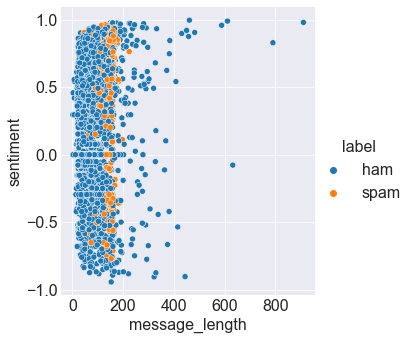

In [101]:
#plot message_length vs sentiment and hue by label
sns.relplot(data = df, x = 'message_length', y = 'sentiment', hue = 'label')
plt.show()

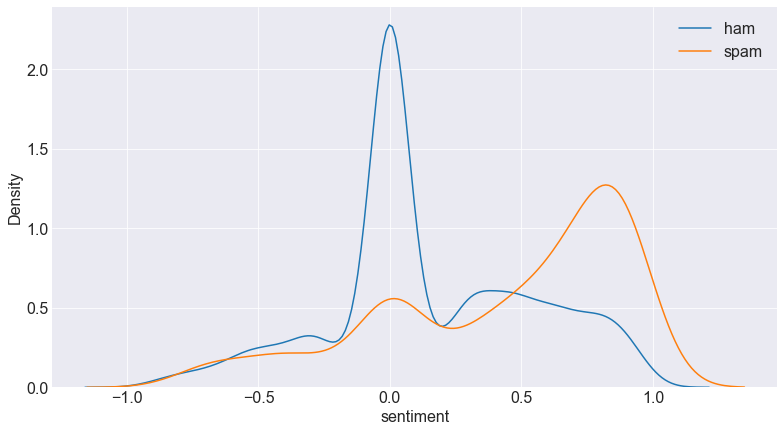

In [102]:
# is the distribution for sentiment different for ham vs spam
sns.kdeplot(df[df.label == 'ham'].sentiment, label = 'ham')
sns.kdeplot(df[df.label == 'spam'].sentiment, label = 'spam')
plt.legend(['ham', 'spam'])

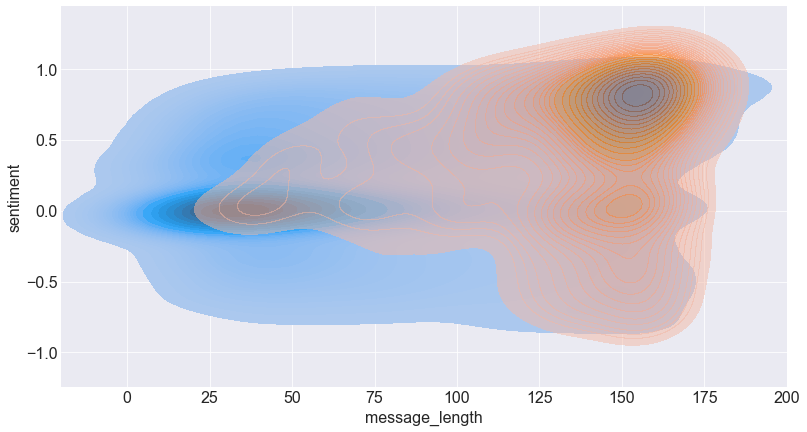

In [106]:
# Bivariate KDE plot for message_length vs sentiment score 
sns.kdeplot(x= df[df.label == 'ham'].message_length,
            y= df[df.label == 'ham'].sentiment, levels = 30, shade = True )
sns.kdeplot(x= df[df.label == 'spam'].message_length,
            y= df[df.label == 'spam'].sentiment, levels = 30, shade = True, alpha = 0.5 )
plt.xlim(-20,200)
plt.show()

## More Resources

- [kaggle wikipedia movie plots](https://www.kaggle.com/jrobischon/wikipedia-movie-plots)
    - Suggestion: narrow to top n genres that aren't unknown
- [wikitable extractor](https://wikitable2csv.ggor.de/) (Try with, e.g. [helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes))
- [Textblob library](https://textblob.readthedocs.io/en/dev/)